In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.io import output_file, show, output_notebook
from bokeh.layouts import column, gridplot
from bokeh.plotting import figure
from bokeh.palettes import brewer
output_notebook()
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold

%matplotlib inline

Loading BokehJS ...

In [16]:
#oof_dir = '../input/lgbm-with-words-and-chars-n-gram/'
oof = pd.read_csv("lvl0_lgbm_clean_oof.csv")

In [17]:
oof['toxic'].shape, oof['toxic_oof'].shape

((159571,), (159571,))

In [38]:
class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
class_preds = [c_ + "_oof" for c_ in class_names]
folds = KFold(n_splits=4, shuffle=True, random_state=0)

In [ ]:
figures = []
for i_class, class_name in enumerate(class_names):
    # create a new plot for current class
    # Compute full score :
    full = roc_auc_score(oof[class_names[i_class]], oof[class_preds[i_class]])
    # Compute average score
    avg = 0.0
    for n_fold, (_, val_idx) in enumerate(folds.split(oof)):
        avg += roc_auc_score(oof[class_names[i_class]].iloc[val_idx], oof[class_preds[i_class]].iloc[val_idx]) / folds.n_splits
    
    s = figure(plot_width=750, plot_height=300, 
               title="F1 score vs threshold for %s full oof %.6f / avg fold %.6f" % (class_name, full, avg))
    
    for n_fold, (_, val_idx) in enumerate(folds.split(oof)):
        # Get False positives, true positives and the list of thresholds used to compute them
        fpr, tpr, thresholds = roc_curve(oof[class_names[i_class]].iloc[val_idx], 
                                         oof[class_preds[i_class]].iloc[val_idx])
        # Compute recall, precision and f1_score
        recall = tpr
        precision = tpr / (fpr + tpr + 1e-5)
        f1_scores = 2 * precision * recall / (precision + recall + 1e-5)
        # Finally plot the f1_scores against thresholds
        s.line(thresholds, f1_scores, name="Fold %d" % n_fold, color=brewer["Set1"][4][n_fold])
        import pdb
        pdb.set_trace()
    figures.append(s)

# put the results in a column and show
show(column(figures))

> <ipython-input-22-0596acfe49f1>(14)<module>()
-> for n_fold, (_, val_idx) in enumerate(folds.split(oof)):
(Pdb) oof[class_preds[i_class]].iloc[val_idx].nunique()
39322
(Pdb) class_name, n_fold, len(thresholds), np.sum(oof[class_names[i_class]].iloc[val_idx] == 1), oof[class_preds[i_class]].iloc[val_idx].nunique()
('toxic', 0, 3196, 3848, 39322)
(Pdb) c
> <ipython-input-22-0596acfe49f1>(14)<module>()
-> for n_fold, (_, val_idx) in enumerate(folds.split(oof)):
(Pdb) class_name, n_fold, len(thresholds), np.sum(oof[class_names[i_class]].iloc[val_idx] == 1), oof[class_preds[i_class]].iloc[val_idx].nunique()
('toxic', 1, 3257, 3770, 39342)
(Pdb) c
> <ipython-input-22-0596acfe49f1>(14)<module>()
-> for n_fold, (_, val_idx) in enumerate(folds.split(oof)):
(Pdb) class_name, n_fold, len(thresholds), np.sum(oof[class_names[i_class]].iloc[val_idx] == 1), oof[class_preds[i_class]].iloc[val_idx].nunique()
('toxic', 2, 3237, 3868, 39359)
(Pdb) c
> <ipython-input-22-0596acfe49f1>(14)<module>()
-> fo

In [39]:
from base_layer_results_repo import BaseLayerResultsRepo

In [40]:
base_layer_results_repo = BaseLayerResultsRepo()

load from file


In [41]:
scores = base_layer_results_repo.show_scores()

0.9827	ModelName.NBLSVC_wordtfidf_ng13_mf10w_chartfidf_ng25_mf20w_real
0.9825	ModelName.RNN_rnn_data_001
0.9818	ModelName.ONELOGREG_wordtfidf_ng13_mf10w_chartfidf_ng25_mf20w_real
0.9815	ModelName.NBLSVC_tfidf_wordchar_charmaxdf0.300000_ng(1, 2)_wmf100000_cmf100000
0.9803	ModelName.NBSVM_tfidf_wordchar_charmaxdf0.300000_ng(1, 2)_wmf100000_cmf100000
0.9794	ModelName.LGB_tfidf_wordchar_charmaxdf0.300000_ng(1, 2)_wmf100000_cmf100000
0.9793	ModelName.LOGREG_tfidf_wordchar_charmaxdf0.300000_ng(1, 2)_wmf100000_cmf100000
0.9786	ModelName.ONESVC_wordtfidf_ng13_mf10w_chartfidf_ng25_mf20w
0.9774	ModelName.NBLSVC_tfidf_word_df2_ng(1, 1)_wmf200000
0.9768	ModelName.NBSVM_tfidf_word_df2_ng(1, 1)_wmf200000
0.9765	ModelName.NBLSVC_tfidf_word_df2_ng(1, 2)_wmf200000
0.9761	ModelName.NBSVM_tfidf_word_df2_ng(1, 2)_wmf200000
0.976	ModelName.LOGREG_tfidf_word_df2_ng(1, 1)_wmf200000
0.9752	ModelName.LOGREG_tfidf_word_df2_ng(1, 2)_wmf200000
0.9726	ModelName.LGB_tfidf_word_df2_ng(1, 2)_wmf200000
0.9723	ModelNam

layer1_oof_train_loaded, layer1_oof_test_loaded, base_layer_est_preds_loaded = base_layer_results_repo.get_results(threshold=0.9825)

In [58]:
chosen_ones = ['ModelName.LGB_tfidf_wordchar_charmaxdf0.300000_ng(1, 2)_wmf100000_cmf100000']

In [59]:
layer1_oof_train_loaded, layer1_oof_test_loaded, base_layer_est_preds_loaded = base_layer_results_repo.get_results(chosen_ones=chosen_ones)

In [60]:
base_layer_est_preds_loaded.keys()

dict_keys(['ModelName.LGB_tfidf_wordchar_charmaxdf0.300000_ng(1, 2)_wmf100000_cmf100000'])

In [67]:
type(base_layer_est_preds_loaded)

dict

(array([ 148564.,    1353.,     718.,     482.,     371.,     296.,
            297.,     330.,     345.,     408.]),
 array([  5.60284299e-06,   9.96644662e-02,   1.99323330e-01,
          2.98982193e-01,   3.98641056e-01,   4.98299919e-01,
          5.97958783e-01,   6.97617646e-01,   7.97276509e-01,
          8.96935373e-01,   9.96594236e-01]),
 <a list of 10 Patch objects>)

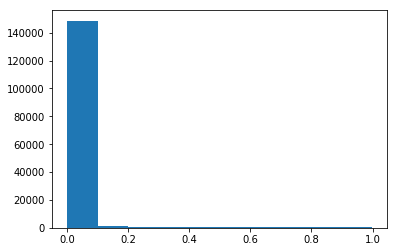

In [80]:
plt.hist(base_layer_est_preds_loaded['ModelName.LGB_tfidf_wordchar_charmaxdf0.300000_ng(1, 2)_wmf100000_cmf100000'][:,5])

In [53]:
import pandas as pd
PATH = '~/data/toxic/data/'

train = pd.read_csv(PATH + 'cleaned_train.csv')
#train = pd.read_csv('/home/kai/data/wei/Toxic/data/Shiyi_training.csv').fillna('na')

test = pd.read_csv(PATH + 'cleaned_test.csv')

#train = train.head(1000)
#test = test.head(1000)

train_sentence = train['comment_text_cleaned']
test_sentence = test['comment_text_cleaned']

text = pd.concat([train_sentence, test_sentence])

print(train.shape)
print(test.shape)


(159571, 27)
(153164, 21)


In [61]:
train_np = np.array(train[class_names])

print(train_np.shape), print(layer1_oof_train_loaded['toxic'][0].shape)

oof_41 = None
for i, label in enumerate(class_names):
    train_np =  np.hstack((train_np, layer1_oof_train_loaded[label][0]))

print(train_np.shape)

oof_41_pd_cols = class_names + [name+"_oof" for name in class_names]

print(oof_41_pd_cols)

oof_41_pd = pd.DataFrame(train_np, columns=oof_41_pd_cols)

print(oof_41_pd.head())

(159571, 6)
(159571, 1)
(159571, 12)
['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'toxic_oof', 'severe_toxic_oof', 'obscene_oof', 'threat_oof', 'insult_oof', 'identity_hate_oof']
   toxic  severe_toxic  obscene  threat  insult  identity_hate  toxic_oof  \
0    0.0           0.0      0.0     0.0     0.0            0.0   0.006856   
1    0.0           0.0      0.0     0.0     0.0            0.0   0.029557   
2    0.0           0.0      0.0     0.0     0.0            0.0   0.006458   
3    0.0           0.0      0.0     0.0     0.0            0.0   0.000914   
4    0.0           0.0      0.0     0.0     0.0            0.0   0.038225   

   severe_toxic_oof  obscene_oof  threat_oof  insult_oof  identity_hate_oof  
0          0.000152     0.000449    0.000002    0.000739           0.000026  
1          0.002953     0.006714    0.000008    0.006539           0.000104  
2          0.000046     0.000848    0.000005    0.001579           0.000041  
3          0.0000

In [62]:
oof = oof_41_pd

In [63]:
figures = []
for i_class, class_name in enumerate(class_names):
    # create a new plot for current class
    # Compute full score :
    full = roc_auc_score(oof[class_names[i_class]], oof[class_preds[i_class]])
    # Compute average score
    avg = 0.0
    for n_fold, (_, val_idx) in enumerate(folds.split(oof)):
        avg += roc_auc_score(oof[class_names[i_class]].iloc[val_idx], oof[class_preds[i_class]].iloc[val_idx]) / folds.n_splits
    
    s = figure(plot_width=750, plot_height=300, 
               title="F1 score vs threshold for %s full oof %.6f / avg fold %.6f" % (class_name, full, avg))
    
    for n_fold, (_, val_idx) in enumerate(folds.split(oof)):
        # Get False positives, true positives and the list of thresholds used to compute them
        fpr, tpr, thresholds = roc_curve(oof[class_names[i_class]].iloc[val_idx], 
                                         oof[class_preds[i_class]].iloc[val_idx])
        # Compute recall, precision and f1_score
        recall = tpr
        precision = tpr / (fpr + tpr + 1e-5)
        f1_scores = 2 * precision * recall / (precision + recall + 1e-5)
        # the first threshold if sometimes set to max(yhat) + 1 to deal with 0 data points situation.
        # when this happens, delete the first threshold and f1_scores (and fpr, tpr if needed)
        # (topic: https://github.com/scikit-learn/scikit-learn/issues/3097)
        if thresholds[0] > 1: 
            thresholds = thresholds[1:]
            f1_scores = f1_scores[1:]
        # Finally plot the f1_scores against thresholds
        s.line(thresholds, f1_scores, name="Fold %d" % n_fold, color=brewer["Set1"][4][n_fold])
    figures.append(s)

# put the results in a column and show
show(column(figures))

In [57]:
figures = []
for i_class, class_name in enumerate(class_names):
    # create a new plot for current class
    # Compute full score :
    full = roc_auc_score(oof[class_names[i_class]], oof[class_preds[i_class]])
    # Compute average score
    avg = 0.0
    for n_fold, (_, val_idx) in enumerate(folds.split(oof)):
        avg += roc_auc_score(oof[class_names[i_class]].iloc[val_idx], oof[class_preds[i_class]].iloc[val_idx]) / folds.n_splits
    
    s = figure(plot_width=400, plot_height=400, 
               title="%s ROC curves OOF %.6f / Mean %.6f" % (class_name, full, avg))
    
    for n_fold, (_, val_idx) in enumerate(folds.split(oof)):
        # Get False positives, true positives and the list of thresholds used to compute them
        fpr, tpr, thresholds = roc_curve(oof[class_names[i_class]].iloc[val_idx], 
                                         oof[class_preds[i_class]].iloc[val_idx])
        s.line(fpr, tpr, name="Fold %d" % n_fold, color=brewer["Set1"][4][n_fold])
        s.line([0, 1], [0, 1], color='navy', line_width=1, line_dash="dashed")

    figures.append(s)

# put the results in a column and show
show(gridplot(np.array_split(figures, 3)))

In [18]:
m1 = np.zeros((6,4))

In [19]:
m1

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [26]:
m1[0][1] = m2

ValueError: setting an array element with a sequence.

In [30]:
m2 = np.ones((3,1))

In [31]:
m2

array([[ 1.],
       [ 1.],
       [ 1.]])

In [32]:
m3 = np.ones((3,1))

In [35]:
(m2+m3).shape

(3, 1)

In [36]:
m2+m3

array([[ 2.],
       [ 2.],
       [ 2.]])